### This example shows how to create bigger SSAKG, and insert some number of sequences (e.g. 500).

We start to create a SSAKG with 1000 neurons, each neuron corresponding to a single symbol.
Suppose that we would like to insert sequences of length 10. In order to insert 500 sequences SequenceGenerator object was used.

In [1]:
from ssakg.ssakg import SSAKG
from ssakg.utils.sequence_generator import SequenceGenerator
from ssakg.utils.ssakg_tester import SSAKG_Tester

number_of_symbols = 1000
sequence_length = 10
number_of_sequences = 500

ssakg = SSAKG(number_of_symbols=number_of_symbols, sequence_length=sequence_length)

sequence_generator = SequenceGenerator(sequence_length=sequence_length, sequence_min=0, sequence_max=number_of_symbols)
sequences = sequence_generator.generate_unique_sequences(number_of_sequences, unique_elements=False)

ssakg.insert(sequences)

It is rather not convenient to draw full graph view, instead we draw SSAKG matrix.

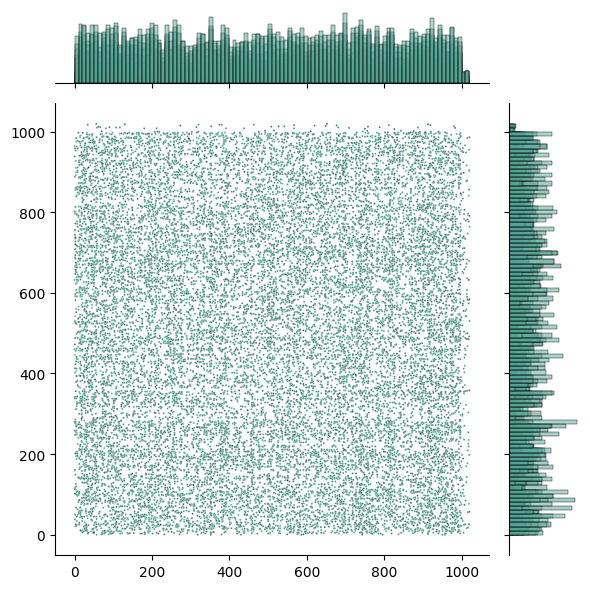

In [2]:
ssakg.draw_density()

Let's make some test. For this purpose we use SSAKG_Tester object. This tester reads all sequences, and make test ordering for the provided algorithms. If you wish to use different algorithms to test you need to use parameter algorithm_list in SSAKG_Tester constructor.

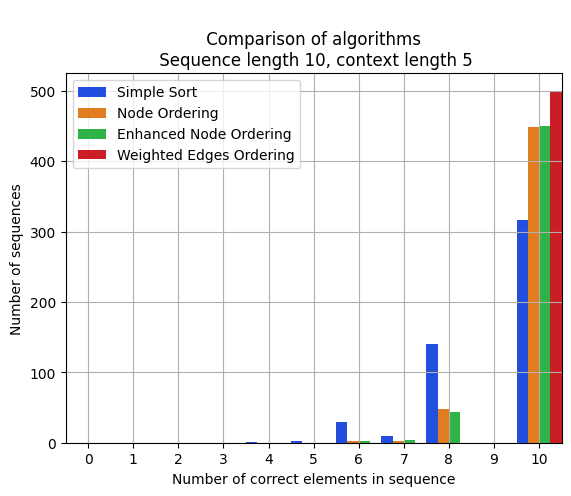

ssakg dimension: 1021
sequence length: 10
context length: 5
unordered sequences restored: 100.00%
                         no sequences  correct  incorrect correct sort percentage
Simple Sort                       500      317        183                  63.40%
Node Ordering                     500      448         52                  89.60%
Enhanced Node Ordering            500      450         50                  90.00%
Weighted Edges Ordering           500      500          0                 100.00%


In [3]:
ssakg_tester = SSAKG_Tester(ssakg, sequences)
ssakg_tester.make_test(context_length=5, show_progress=False)

ssakg_tester.plot_agreement_histogram(draw_text=True)
print(ssakg_tester)